In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set(style='darkgrid')
from matplotlib import style
#sta matplotlib to inline and displays graphs below the corresponding cell.
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff



print(f"Above Libraries were successfully loaded")

Above Libraries were successfully loaded


In [19]:
df=pd.read_csv("reviews.csv")
df.head(3)

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo


In [20]:
df.shape

(15746, 11)

In [21]:
print(f"No. of Rows: {df.shape[0]}\nNo. of columns:{df.shape[1]}")

No. of Rows: 15746
No. of columns:11


In [22]:
df.columns

Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId'],
      dtype='object')

In [23]:
df.drop(["userImage",'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder','appId'],1,inplace=True)

In [24]:
df.head()

,userName,content,score
0,Andrew Thomas,Update: After getting a response from the deve...,1
1,Craig Haines,Used it for a fair amount of time without any ...,1
2,steven adkins,Your app sucks now!!!!! Used to be good but no...,1
3,Lars Panzerbjørn,"It seems OK, but very basic. Recurring tasks n...",1
4,Scott Prewitt,Absolutely worthless. This app runs a prohibit...,1


In [25]:
df.isnull().sum()

userName    0
content     0
score       0
dtype: int64

In [26]:
df.score.value_counts()

3    5042
5    2900
4    2776
1    2566
2    2462
Name: score, dtype: int64

In [27]:
temp = df.groupby('score').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='BuGn')

,score,content
2,3,5042
4,5,2900
3,4,2776
0,1,2566
1,2,2462


- 1,2 - Negative
- 3 - Neutral
- 4,5 - Positive


The rating 3 is Neutral, the rating 1,2 pertains Negative, rating 4,5 pertains Positive.

In [28]:
cond=[df.score==1,df.score==2,df.score==3,df.score==4,df.score==5]
choice=["Negative","Negative","Neutral","Positive","Positive"]
df["Polarity"]=np.select(cond,choice)

In [29]:
df.head()

,userName,content,score,Polarity
0,Andrew Thomas,Update: After getting a response from the deve...,1,Negative
1,Craig Haines,Used it for a fair amount of time without any ...,1,Negative
2,steven adkins,Your app sucks now!!!!! Used to be good but no...,1,Negative
3,Lars Panzerbjørn,"It seems OK, but very basic. Recurring tasks n...",1,Negative
4,Scott Prewitt,Absolutely worthless. This app runs a prohibit...,1,Negative


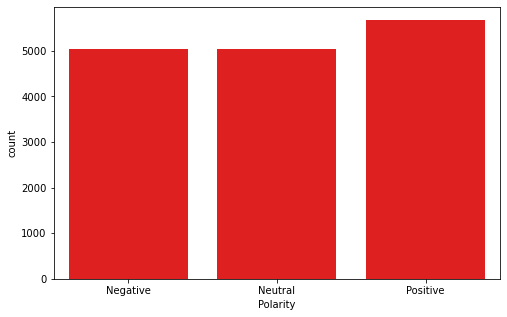

In [35]:
plt.figure(figsize=(8,5))
# df.Polarity.value_counts().rename({2:'Positive',1:'Neutral',0:'Negative'}).plot.bar()
sns.countplot(x="Polarity",data=df,color="red")
plt.xticks(rotation=0)
plt.show()

In [36]:
temp = df.groupby('Polarity').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='BuGn')

,Polarity,content
2,Positive,5676
1,Neutral,5042
0,Negative,5028


In [39]:
fig = go.Figure(data=go.Funnelarea(text =temp.Polarity,values=temp.content,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))

fig.show()


# fig = go.Figure()
# fig.add_trace(go.Funnelarea(text =temp.Polarity,values=temp.content,
#                             title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}))
# fig.show()

In [ ]:
cond=[df.Polarity=="Negative",df.Polarity=="Neutral",df.Polarity=="Positive"]
choice=[0,1,2]
df["Polarity"]=np.select(cond,choice)

In [40]:
#clening the text and applying stemming
from utils.data_preprocess import cleantext #myownlib

df["clean_text"]=cleantext(df,"content")

Enter what type of stemmer you need to apply to text:WordNetLemmatizer


In [42]:
df.head()

,userName,content,score,Polarity,clean_text
0,Andrew Thomas,Update: After getting a response from the deve...,1,Negative,update getting response developer would change...
1,Craig Haines,Used it for a fair amount of time without any ...,1,Negative,used fair amount time without problem suddenly...
2,steven adkins,Your app sucks now!!!!! Used to be good but no...,1,Negative,app suck used good doesnt update physically op...
3,Lars Panzerbjørn,"It seems OK, but very basic. Recurring tasks n...",1,Negative,seems ok basic recurring task need work actual...
4,Scott Prewitt,Absolutely worthless. This app runs a prohibit...,1,Negative,absolutely worthless app run prohibitively clu...


In [43]:
from collections import Counter
df['common_words'] = df["clean_text"].apply(lambda x:str(x).split())
top = Counter([item for sublist in df["common_words"] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,app,10921
1,task,4355
2,time,2876
3,like,2707
4,use,2411
5,list,2312
6,great,2292
7,would,2290
8,good,2235
9,day,2143


In [44]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [46]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

### Most common Words Sentiment Wise

In [47]:
Positive_sent = df[df.Polarity=="Positive"] 
Negative_sent = df[df.Polarity=="Negative"]
Neutral_sent = df[df.Polarity=="Neutral"]

In [48]:
Positive_sent.head(3)

,userName,content,score,Polarity,clean_text,common_words
800,Arush Gupta,Love the app... But the reminder function is n...,4,Positive,love app reminder function working well otherw...,"[love, app, reminder, function, working, well,..."
801,Adel Abdull,Reminders don't pop up if the app isn't open s...,4,Positive,reminder dont pop app isnt open clearing open ...,"[reminder, dont, pop, app, isnt, open, clearin..."
802,Stephen Mbugua,Excellent app and honestly my life would be so...,4,Positive,excellent app honestly life would disorganised...,"[excellent, app, honestly, life, would, disorg..."


In [49]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['common_words'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(50))
temp_positive=temp_positive.iloc[1:,:]
temp_positive.columns = ['Common_words','count']
print("LIST OF ALL COMMON POSTIVE WORDS")
temp_positive.style.background_gradient(cmap='Greens')


LIST OF ALL COMMON POSTIVE WORDS


,Common_words,count
1,task,1507
2,great,1266
3,like,1066
4,love,1052
5,good,951
6,use,926
7,would,916
8,time,904
9,list,830
10,day,822


In [50]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [60]:
#MosT common Negative words
top = Counter([item for sublist in Negative_sent['common_words'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(25))
temp_negative = temp_negative.iloc[6:,:].reset_index(drop=True)
temp_negative.columns = ['Common_words','count']
print("LIST OF ALL COMMON NEGATIVE WORDS")
temp_negative.style.background_gradient(cmap='Reds')

LIST OF ALL COMMON NEGATIVE WORDS


,Common_words,count
0,dont,666
1,list,655
2,day,632
3,like,628
4,cant,624
5,version,613
6,doesnt,600
7,feature,569
8,even,569
9,one,558


In [61]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [62]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [63]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['common_words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
print("LIST OF ALL COMMON NEUTRAL WORDS")
temp_neutral.style.background_gradient(cmap='Accent_r')

LIST OF ALL COMMON NEUTRAL WORDS


,Common_words,count
1,task,1631
2,time,1016
3,like,1013
4,would,876
5,list,827
6,good,808
7,use,732
8,day,689
9,great,668
10,calendar,651


In [64]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [65]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

- Let's Look at Unique Words in each Segment,We will look at unique words in each segment in the Following Order:

+ Positive
+ Negative
+ Neutral

In [66]:
raw_text = [word for word_list in df['common_words'] for word in word_list]

In [67]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in df[df.Polarity != sentiment]['common_words']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in df[df.Polarity != sentiment]['common_words']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.Polarity == sentiment]['common_words']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

### Unique Postive Tweets

In [109]:
Unique_Positive= words_unique('Positive', 50, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,superb,18
1,combine,16
2,creative,15
3,procrastinator,13
4,💚,12
5,organising,11
6,aesthetic,10
7,lifestyle,9
8,food,9
9,anxiety,9


In [69]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

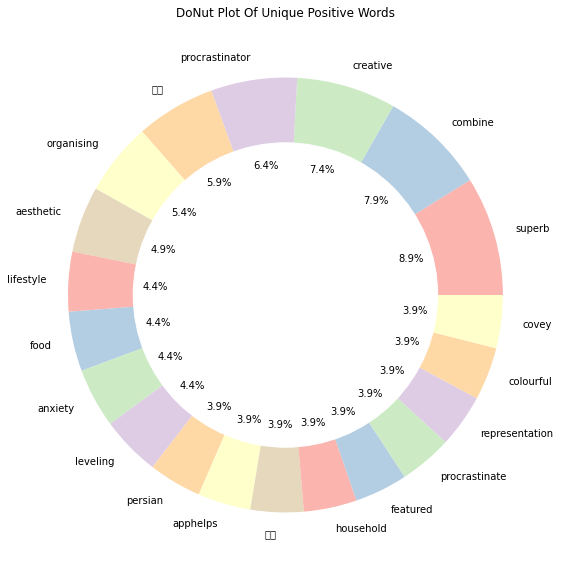

In [83]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors,autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.savefig("DoNut Plot Of Unique Positive Words.jpg")
plt.show()

In [110]:
Unique_Negative= words_unique('Negative', 50, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,👎,61
1,💩,40
2,poorly,15
3,scam,14
4,false,12
5,acknowledge,12
6,fb,11
7,pathetic,9
8,dumb,9
9,rubbish,8


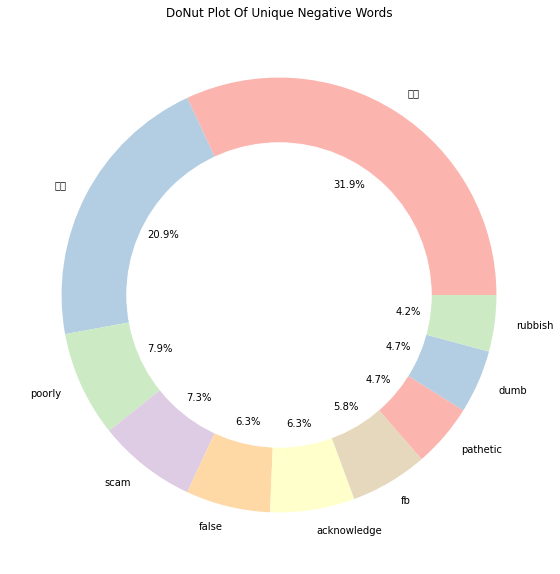

In [84]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors,autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.savefig("DoNut Plot Of Unique Negative Words.jpg")
plt.show()

In [111]:
Unique_Neutral= words_unique('Neutral', 50, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')


The top 10 unique words in Neutral Tweets are:


,words,count
0,accidently,11
1,warrior,10
2,wallpaper,9
3,pickup,7
4,attendee,7
5,به,7
6,راست,6
7,reduced,6
8,incorrectly,6
9,🏿,6


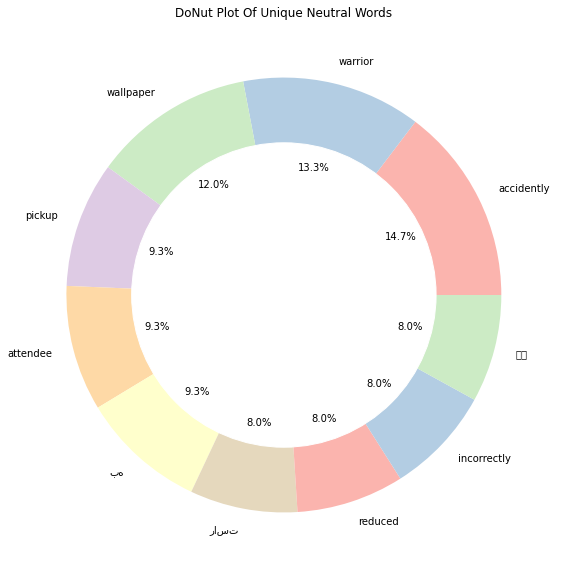

In [88]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors,autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.savefig("DoNut Plot Of Unique Neutral Words.jpg")
plt.show()

### WordCloud for:
- Postive Sentiment
- Negative Sentiment
- Neutral sentiment

In [112]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

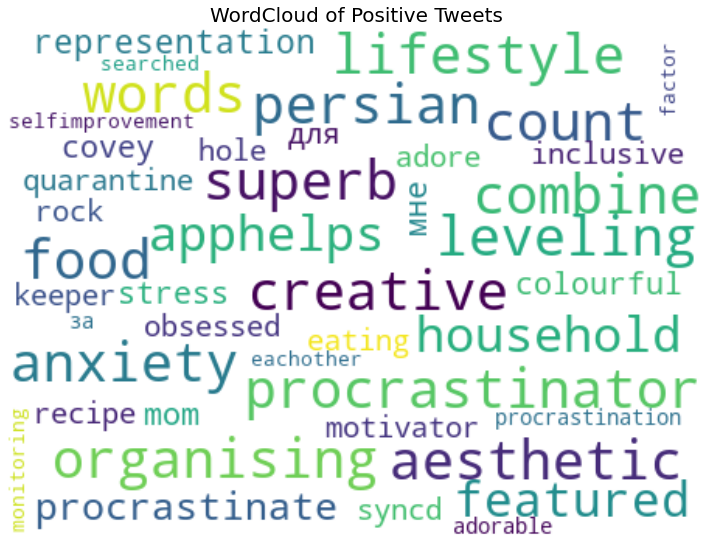

In [135]:
wc = WordCloud(width=450, height=330, max_words=50, stopwords=stopwords,max_font_size=35,background_color='white').generate(str(Unique_Positive))

plt.figure(figsize=(10, 10))
plt.title("WordCloud of Positive Tweets",fontsize=(20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig("WordCloud of postive Tweets.jpg")
plt.show()

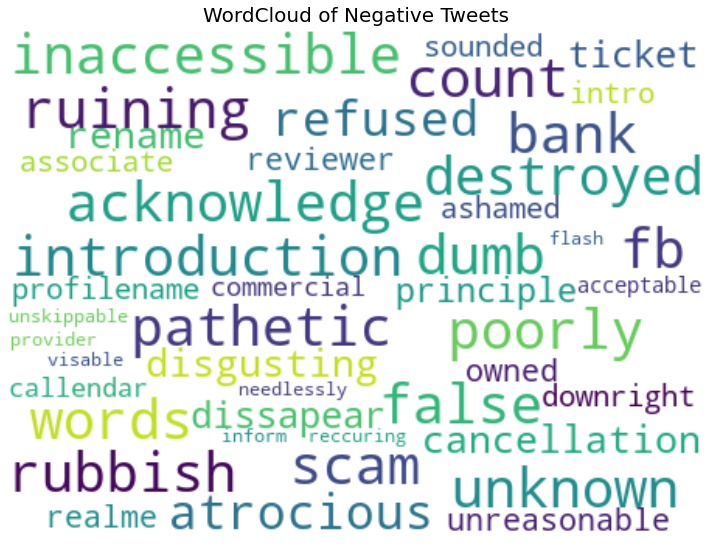

In [136]:
wc = WordCloud(width=450, height=330, max_words=50, stopwords=stopwords,max_font_size=35,background_color='white').generate(str(Unique_Negative))

plt.figure(figsize=(10, 10))
plt.title("WordCloud of Negative Tweets",fontsize=(20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig("WordCloud of negative Tweets.jpg")
plt.show()

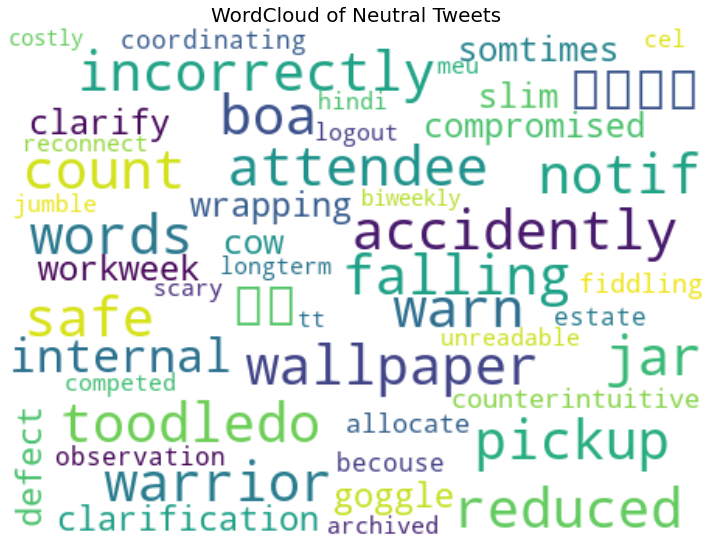

In [137]:
wc = WordCloud(width=450, height=330, max_words=50, stopwords=stopwords,max_font_size=35,background_color='white').generate(str(Unique_Neutral))

plt.figure(figsize=(10, 10))
plt.title("WordCloud of Neutral Tweets",fontsize=(20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig("WordCloud of Neutral Tweets.jpg")
plt.show()

In [11]:
z=(("he",2),("praveen",1),("sai",3),("arun",5))
z

(('he', 2), ('praveen', 1), ('sai', 3), ('arun', 5))

In [12]:
f=dict(z)
f

{'he': 2, 'praveen': 1, 'sai': 3, 'arun': 5}